# Tarea - Ajuste de curvas

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [106]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])
m = 27
x = np.linspace(0,26,27)
y = data

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

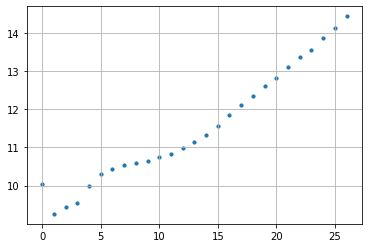

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure()
plt.scatter(x,y, s = 10)
plt.grid()

In [108]:
def funcion_de_costo (beta,X,y):
    beta = np.reshape (beta, [2,-1]) #porque en este caso es un vector vertical con 4 elementos
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

In [109]:
ones = np.ones ([m, 1])
x_1 = np.reshape (x, [m, -1])

X1 = np.hstack ((ones, x_1))

In [110]:
beta_inicial = np.random.rand(2)
y = np.reshape(y, [m, -1])

In [111]:
funcion_de_costo(beta_inicial, X1, y)

512.3989166068438

In [112]:
import scipy.optimize as opt 
sol = opt.minimize (funcion_de_costo,
                   beta_inicial,
                   args = (X1, y))
sol 

      fun: 2.3704889518154317
 hess_inv: array([[ 0.07010582, -0.00396825],
       [-0.00396825,  0.00030525]])
      jac: array([2.98023224e-07, 1.22189522e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([9.11567635, 0.18667055])

In [113]:
def funcion_de_costo2 (beta,X,y):
    beta = np.reshape (beta, [3,-1]) #porque en este caso es un vector vertical con 4 elementos
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

In [114]:
ones = np.ones ([m, 1])
x_1 = np.reshape (x, [m, -1]) 
x_2 = np.reshape(x**2, [m, -1]) 

X2 = np.hstack ((ones, x_1, x_2))

In [115]:
beta_inicial = np.random.rand(3)
y = np.reshape(y, [m, -1])

In [116]:
funcion_de_costo2(beta_inicial, X2, y)

990468.1230500739

In [117]:
import scipy.optimize as opt 
sol = opt.minimize (funcion_de_costo2,
                   beta_inicial,
                   args = (X2, y))
sol 

      fun: 0.8443845194033034
 hess_inv: array([[ 1.44233837e-01, -2.17582240e-02,  6.84208169e-04],
       [-2.17582240e-02,  4.57472666e-03, -1.64207393e-04],
       [ 6.84208169e-04, -1.64207393e-04,  6.31559947e-06]])
      jac: array([7.45058060e-09, 1.56462193e-07, 3.21120024e-06])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 9
     njev: 13
   status: 0
  success: True
        x: array([9.59128644e+00, 7.25241277e-02, 4.39024721e-03])

In [118]:
def funcion_de_costo3 (beta,X,y):
    beta = np.reshape (beta, [4,-1]) #porque en este caso es un vector vertical con 4 elementos
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

In [119]:
ones = np.ones ([m, 1])
x_1 = np.reshape (x, [m, -1]) 
x_2 = np.reshape(x**2, [m, -1]) 
x_3 = np.reshape (x**3,[m, -1]) 

X3 = np.hstack ( (ones, x_1, x_2, x_3) )


In [120]:
beta_inicial = np.random.rand(4)
y = np.reshape(y, [m, -1])

In [121]:
funcion_de_costo3(beta_inicial, X3, y)

197188978.6833371

In [122]:
import scipy.optimize as opt 
sol = opt.minimize (funcion_de_costo3,
                   beta_inicial,
                   args = (X3, y))
sol 

      fun: 0.8404346757660173
 hess_inv: array([[ 2.27341691e-01, -6.40802999e-02,  4.82980093e-03,
        -1.06284065e-04],
       [-6.40802999e-02,  2.62007956e-02, -2.28393099e-03,
         5.43567986e-05],
       [ 4.82980093e-03, -2.28393099e-03,  2.14110044e-04,
        -5.32875986e-06],
       [-1.06284065e-04,  5.43567986e-05, -5.32875986e-06,
         1.36654581e-07]])
      jac: array([ 5.96046448e-08,  1.93715096e-07, -2.98023224e-08, -2.23517418e-08])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([9.56752299e+00, 8.46495847e-02, 3.20207426e-03, 3.04659734e-05])

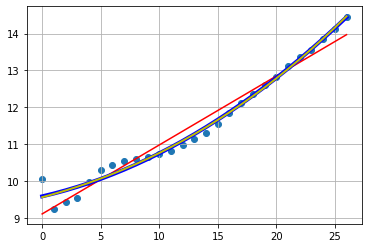

In [138]:
y_real = np.sort(x)
y_pred1 = 9.11567635 + 0.18667055*x
y_pred2 = 9.59128644e+00 + 7.25241277e-02*x + 4.39024721e-03*(x**2)
y_pred3 = 9.56752299e+00 + 8.46495847e-02*x + 3.20207426e-03*(x**2) + 3.04659734e-05*(x**3)

plt.figure()
plt.scatter(x,y)
#plt.plot(x,y_real,)
plt.plot(x,y_pred1, "r")
plt.plot(x,y_pred2, "b", linewidth= 4)
plt.plot (x,y_pred3, "y", linewidth =2)
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [141]:
datos = pd.read_csv("population_data.csv")
datos

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


In [232]:
m = 66
x = np.linspace(0,65,66)

In [233]:
y = datos.Poblacion.tolist()

In [234]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [2, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

ones = np.ones([m, 1]) 
x_1 = np.reshape(x, [m, -1]) 

X = np.hstack((ones, x_1))

beta_inicial = np.random.rand(2)
y = np.reshape(y, [m,-1])

funcion_de_costo(beta_inicial, X, y)

import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo,
                beta_inicial,
                args=(X,y))
sol

      fun: 212137169.5442833
 hess_inv: array([[ 5.29943948e-03, -1.21689191e-04],
       [-1.21689191e-04,  8.14627334e-06]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 51
      nit: 9
     njev: 17
   status: 0
  success: True
        x: array([24138.01530912,  1543.97341775])

In [235]:
funcion_de_costo(beta_inicial, X, y)

421580541589.47534

In [236]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [3, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

ones = np.ones([m, 1]) 
x_1 = np.reshape(x, [m, -1]) 
x_2 = np.reshape(x**2, [m,-1])

X = np.hstack((ones, x_1, x_2))

beta_inicial = np.random.rand(3)
y = np.reshape(y, [m,-1])

funcion_de_costo(beta_inicial, X, y)

import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo,
                beta_inicial,
                args=(X,y))
sol

      fun: 210941621.45620525
 hess_inv: array([[ 7.62205433e-03, -9.67521907e-10, -4.88308427e-10],
       [-9.67521907e-10,  1.42108547e-12,  7.10542736e-13],
       [-4.88308427e-10,  7.10542736e-13,  3.58768570e-13]])
      jac: array([ 0., -2., -8.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 224
      nit: 10
     njev: 53
   status: 2
  success: False
        x: array([2.44255547e+04, 1.51701529e+03, 4.14746777e-01])

In [237]:
funcion_de_costo(beta_inicial, X, y)

409896465066.10315

In [238]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [4, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

ones = np.ones([m, 1]) 
x_1 = np.reshape(x, [m, -1]) 
x_2 = np.reshape(x**2, [m,-1])
x_3 = np.reshape(x**3, [m,-1])

X = np.hstack((ones, x_1, x_2, x_3))

beta_inicial = np.random.rand(4)
y = np.reshape(y, [m,-1])

funcion_de_costo(beta_inicial, X, y)

import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo3,
                beta_inicial,
                args=(X3,y))
sol

      fun: 25240442.638309337
 hess_inv: array([[ 2.33362006e-02, -2.82184309e-03,  8.84210346e-05,
        -7.99531529e-07],
       [-2.82184309e-03,  8.37577263e-04, -3.34284935e-05,
         3.39688344e-07],
       [ 8.84210346e-05, -3.34284935e-05,  1.45123159e-06,
        -1.54918382e-08],
       [-7.99531529e-07,  3.39688344e-07, -1.54918382e-08,
         1.70752646e-10]])
      jac: array([  0. ,   0. ,  -0.5, -22.5])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 232
      nit: 9
     njev: 44
   status: 2
  success: False
        x: array([ 2.84777442e+04,  7.39080594e+02,  3.05648285e+01, -3.09231480e-01])

In [239]:
funcion_de_costo(beta_inicial, X, y)

278817573300.22815

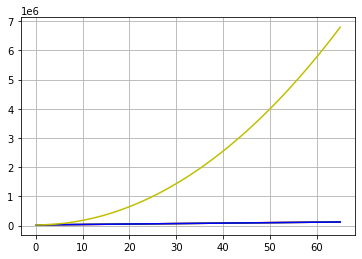

In [240]:
y_pred1 = 24138.03031173 + 1543.97311837*x
y_pred2=  2.44255187e+04 + 1.51701752e+03*x + 4.14718118e-01*(x**2)
y_pred3 = 2.41380192e+04 + 9.78955333e-0*x + 1.54397344e+03*(x**2) + 8.93011505e-01*(x**3)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(x,y, "r")
plt.plot(x, y_pred1, "g")
plt.plot(x, y_pred2, "b")
plt.plot(x, y_pred3, "y")
plt.grid()

Profe, no se cual es mi error, pero la grafica no toma los valores de "y"

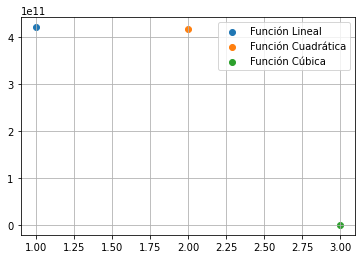

In [241]:
plt.figure()
plt.scatter(1, 421485747627.16766 , label = "Función Lineal")
plt.scatter(2, 417238393682.4238 , label = "Función Cuadrática")
plt.scatter(3, 25240442.639243018 , label = "Función Cúbica")
plt.grid()
plt.legend(loc = "best")

In [242]:
y = datos.Nacimientos.tolist()

In [243]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [2, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

ones = np.ones([m, 1]) # m renglones y 1 columna
x_1 = np.reshape(x, [m, -1]) #columna de factor x con m renglones y 1 columna

X = np.hstack((ones, x_1))

beta_inicial = np.random.rand(2)
y = np.reshape(y, [m,-1])

funcion_de_costo(beta_inicial, X, y)

import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo,
                beta_inicial,
                args=(X,y))
sol

      fun: 4737915058937.528
 hess_inv: array([[ 1.46596939e-02, -3.42946050e-04],
       [-3.42946050e-04,  1.33335184e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 102
      nit: 7
     njev: 34
   status: 0
  success: True
        x: array([1562585.28397796,   21985.53178945])

In [244]:
funcion_de_costo(beta_inicial, X, y)

358558561474714.0

In [245]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [3, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

ones = np.ones([m, 1]) # m renglones y 1 columna
x_1 = np.reshape(x, [m, -1]) #columna de factor x con m renglones y 1 columna
x_2 = np.reshape(x**2, [m,-1])

X = np.hstack((ones, x_1, x_2))

beta_inicial = np.random.rand(3)
y = np.reshape(y, [m,-1])

funcion_de_costo(beta_inicial, X, y)

import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo,
                beta_inicial,
                args=(X,y))
sol

      fun: 492921050437.7407
 hess_inv: array([[ 1.21691779e-01, -8.66503211e-03,  1.18080896e-04],
       [-8.66503211e-03,  7.16630622e-04, -1.03095676e-05],
       [ 1.18080896e-04, -1.03095676e-05,  1.52943689e-07]])
      jac: array([   0.,    0., 8192.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 214
      nit: 8
     njev: 51
   status: 2
  success: False
        x: array([ 1.02111323e+06,  7.27772066e+04, -7.81550358e+02])

In [246]:
funcion_de_costo(beta_inicial, X, y)

358460870012463.0

In [247]:
def funcion_de_costo(beta, X, y):
    beta = np.reshape(beta, [4, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

ones = np.ones([m, 1]) # m renglones y 1 columna
x_1 = np.reshape(x, [m, -1]) #columna de factor x con m renglones y 1 columna
x_2 = np.reshape(x**2, [m,-1])
x_3 = np.reshape(x**3, [m,-1])

X = np.hstack((ones, x_1, x_2, x_3))

beta_inicial = np.random.rand(4)
y = np.reshape(y, [m,-1])

funcion_de_costo(beta_inicial, X, y)

import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo,
                beta_inicial,
                args=(X,y))
sol

      fun: 441782320317.2412
 hess_inv: array([[ 1.99031051e-01, -1.03811925e-01,  4.31893129e-03,
        -4.50626350e-05],
       [-1.03811925e-01,  5.41469862e-02, -2.25277622e-03,
         2.35054722e-05],
       [ 4.31893129e-03, -2.25277622e-03,  9.38002103e-05,
        -9.79268820e-07],
       [-4.50626350e-05,  2.35054722e-05, -9.79268820e-07,
         1.02282576e-08]])
      jac: array([4.0960000e+03, 2.0480000e+04, 8.2739200e+05, 4.3761664e+07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 155
      nit: 11
     njev: 31
   status: 2
  success: False
        x: array([ 1.08835883e+06,  5.98685972e+04, -2.81248062e+02, -5.13138562e+00])

In [248]:
funcion_de_costo(beta_inicial, X, y)

337805965849061.25

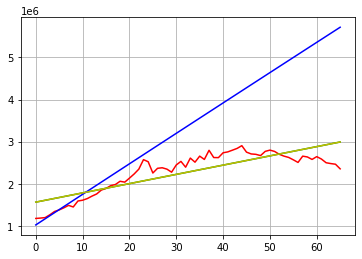

In [249]:
y_pred1 =1562525.06555266 + 21985.88731801*x
y_pred2 = 1.02119737e+06 + 7.27725417e+04*x - 7.81494091e+0*(x**2)
y_pred3 = 1.08842031e+06 + 5.98604229e+04*x - 2.80985006e+02*(x**2) - 5.13380742e+00*(x**3)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()

plt.plot(x, y, "r")
plt.plot(x, y_pred1, "g")
plt.plot(x, y_pred2, "b")
plt.plot(x, y_pred1, "y")

plt.grid()

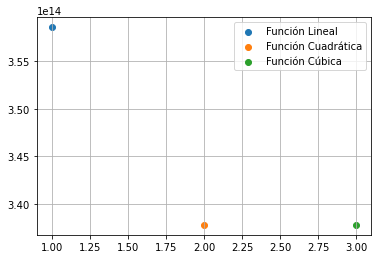

In [250]:
plt.figure()
plt.scatter(1, 358558561474714.0 , label = "Función Lineal")
plt.scatter(2, 337805965849061.25 , label = "Función Cuadrática")
plt.scatter(3, 337805965849061.25 , label = "Función Cúbica")
plt.grid()
plt.legend(loc = "best")
